### I-94 Interestate Highway Dataset

We aim to identify specific factors that contribute to heavy traffic conditions on Interstate 94. These factors could include weather conditions, time of day, or day of the week, among others. For instance, our analysis might reveal that traffic tends to intensify during summer months or in snowy conditions.

The [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) mentions that a station is located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of that station.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read the csv into dataframe
data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

# look at first 5 rows
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The code above shows us our dataset has a total of 9 columns and 48,204 entries. We can also see the data types and if we have any null values, which we do not.

Lets start plotting out some graphs to get an idea of whats going on.
We will start by taking a looking at the traffic volume. This the amount of traffic by hour.

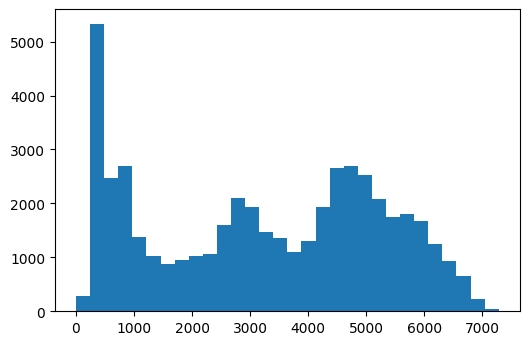

In [3]:
%matplotlib inline

plt.hist(data['traffic_volume'], bins=30)
plt.show()

In [4]:
# get statistics
data["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Looking at the statistics above, we can infer the following:

- 25% of the time, there were 1,193 cars or fewer passing the station each hour. This likely occurs during the nighttime or when the road is under construction.

- 75% of the time, the traffic volume was four times as much (4,933 cars or more).

The possibility that traffic volume could be influenced by whether it's day or night provides an intriguing angle for our analysis: contrasting data collected during daytime with that from nighttime.

We will start by dividing the dataset into two parts:

- Daytime data: hours from 7 a.m. to 7 p.m.
- Nighttime data: hours from 7 p.m. to 7 a.m.

Although this method might not perfectly differentiate between daytime and nighttime, it serves as an effective starting point for our analysis.

In [5]:
data['date_time'] = pd.to_datetime(data['date_time'])

day = data.copy()[(data['date_time'].dt.hour >= 7) & (data['date_time'].dt.hour < 19)]
print(day.shape)

night = data.copy()[(data['date_time'].dt.hour >= 19) | (data['date_time'].dt.hour < 7)]
print(night.shape)



(23877, 9)
(24327, 9)


Now that we have separated `day` and `night`, lets take a look at a histogram chart of them both side-by-side.

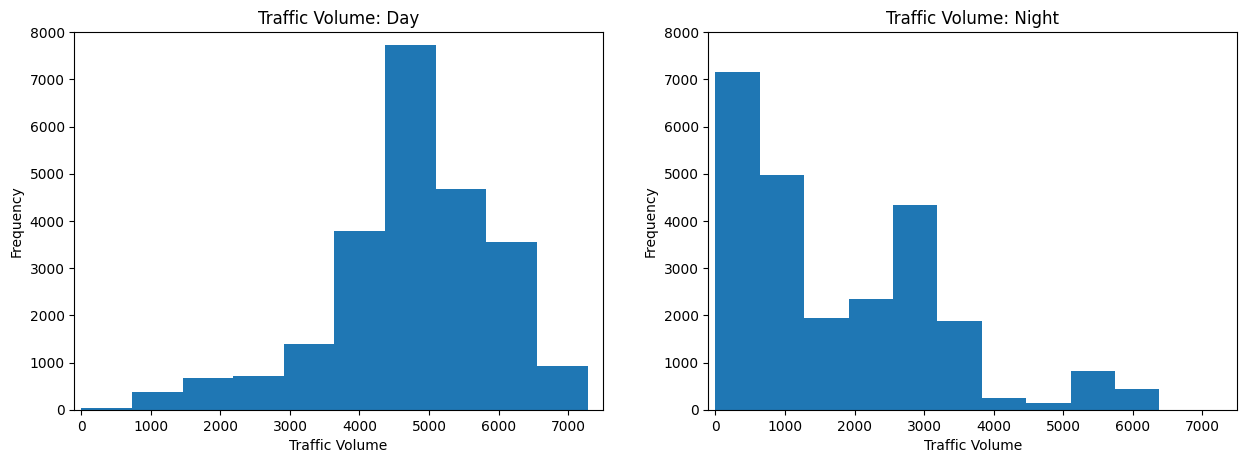

In [6]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [7]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [8]:
night["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The analysis of traffic volumes on I-94 reveals notable differences between daytime and nighttime periods.

During the daytime (7 AM to 7 PM):

- The daytime histogram is left-skewed, indicating that traffic is generally high throughout the day.
- Traffic volume is typically heavier, with an average of approximately 4,762 vehicles.
- The traffic can range from no vehicles to as many as 7,280, with a median volume of 4,820 vehicles.
- The data shows significant variability, suggesting periods of both light and heavy traffic.

In contrast, during the nighttime (7 PM to 7 AM):

- The nighttime histogram is right-skewed, indicating that traffic is generally lighter throughout the night.
- Traffic volume is considerably lighter, averaging around 1,785 vehicles.
- The range of traffic is from zero to 6,386 vehicles, with a median volume of 1,287 vehicles.
- Though the average is lower, the standard deviation is also high, indicating variability in nighttime traffic as well.

In summary, I-94 sees heavier traffic during the day compared to the night. However, both periods experience significant fluctuations in traffic volume.

### Time factors:

Our goal is to find indicators of heavy traffic, so We are only going to look at the day moving forward. 

We are going to look at a few plots to show how traffic volume might change according to the following:

* Month

* Day of the Week

* Time of day

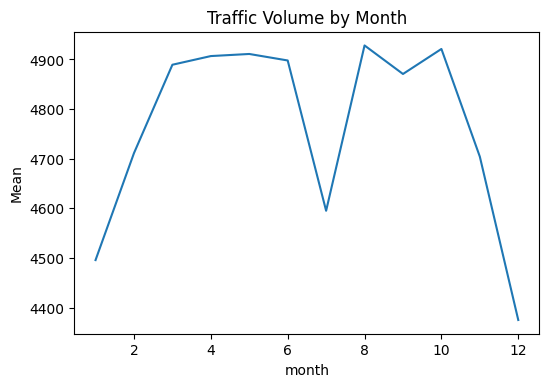

In [9]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.title("Traffic Volume by Month")
plt.ylabel("Mean")
plt.show()

We can observe that traffic volume significantly declines during the colder months, specifically from November through January, with an exception in July. Interestingly, there appears to be a substantial drop in traffic volume in July. Could this be due to construction in the area? After conducting some online research, we found that there was indeed road construction during this month in 2016 [Road Construction](https://www.freep.com/story/news/local/michigan/wayne/2016/06/07/road-construction-on-i94/85554670/). Let's further investigate this by examining the data year by year.

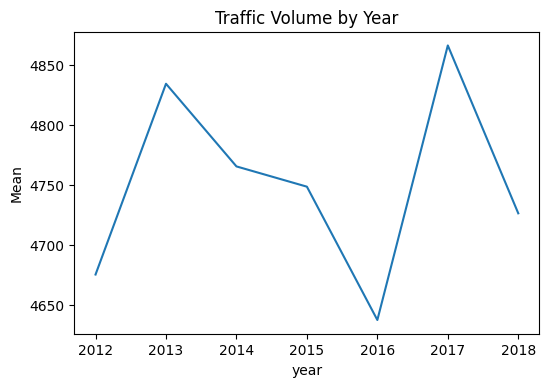

In [10]:
day['year'] = day['date_time'].dt.year
by_year = day.groupby('year').mean()
by_year['traffic_volume'].plot.line()
plt.title("Traffic Volume by Year")
plt.ylabel("Mean")
plt.show()

We have confirmed that the significant decline in traffic volume occurred in 2016, which aligns with the road construction incident we found in our online research. This correlation suggests that external factors such as construction can have a substantial impact on traffic patterns.

Lets look at at the traffic volume by days of the week

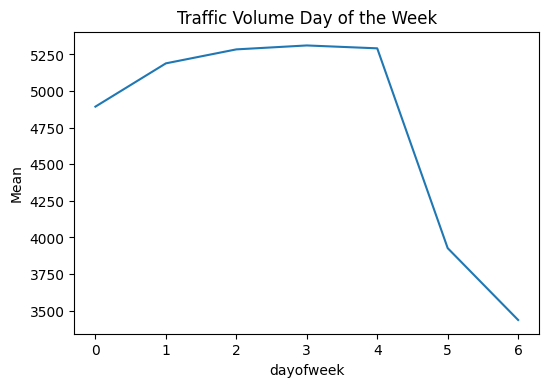

In [61]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.title("Traffic Volume Day of the Week")
plt.ylabel("Mean")
plt.show()

The chart above represents the days of the week, with Monday represented by 0 and Sunday by 6. As we can observe, traffic volume is significantly higher throughout the work week compared to the weekend. Interestingly, Monday appears to be an exception during the work week, with lower traffic volumes around `4,750` compared to over `5,000` for the rest of the work week.

Now lets look at traffic volume by the hour, but separate the work week and weekends.

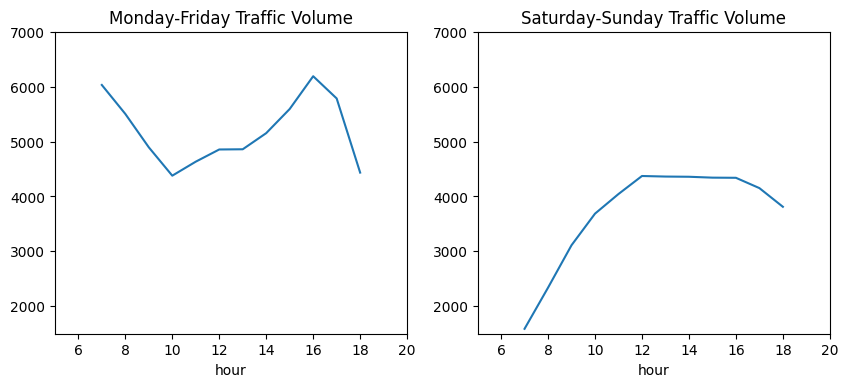

In [60]:
day["hour"] = day["date_time"].dt.hour
business_days = day.copy()[day["dayofweek"] <=4]
weekends = day.copy()[day["dayofweek"] >=5]
by_hour_business = business_days.groupby("hour").mean()
by_hour_weekend = weekends.groupby("hour").mean()

plt.figure(figsize= (10,4))

plt.subplot(1, 2, 1)
by_hour_business["traffic_volume"].plot.line()
plt.xlim(5,20)
plt.ylim(1500, 7000)
plt.title("Monday-Friday Traffic Volume")

plt.subplot(1, 2, 2)
by_hour_weekend["traffic_volume"].plot.line()
plt.xlim(5,20)
plt.ylim(1500, 7000)
plt.title("Saturday-Sunday Traffic Volume")
plt.show()

Throughout the day, it's generally observed that traffic volume is higher during business days (Monday to Friday) than on weekends. This makes sense as most people commute to and from work during the week. Notably, the busiest traffic hours — often referred to as 'rush hours' — occur around 7 am and 4 pm, aligning with typical work hours. During these times, we see a significant increase in traffic, with over 6,000 cars on the road.

To encapsulate, our analysis uncovered several time-dependent patterns associated with heavy traffic:

* Traffic typically increases during the warmer months, from March through October, as compared to the colder months from November to February.
* More vehicles are usually on the road on business days as compared to weekends.
* During business days, peak traffic hours are generally around 7 am and 4 pm.


### Weather Conditions and Traffic

The influence of weather on traffic volume is another aspect we examined. The dataset we have includes several useful weather-related parameters such as `temperature`, rain in the past hour `(rain_1h)`, snow in the past hour `(snow_1h)`, cloud coverage `(clouds_all)`, general weather type `(weather_main)`, and a detailed weather description `(weather_description)`.

Several of these parameters are numerical in nature. As a first step in this part of our analysis, we will examine the correlation between these numerical weather parameters and traffic volume.

In [29]:
day.corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
Name: traffic_volume, dtype: float64

We can see that `temp` shows the highest correlation with `traffic_volume with a postive correlation of `0.13. The other numerical columns do not show a strong correlation.

Lets create a scatter plot to get a visual idea of the correlation.

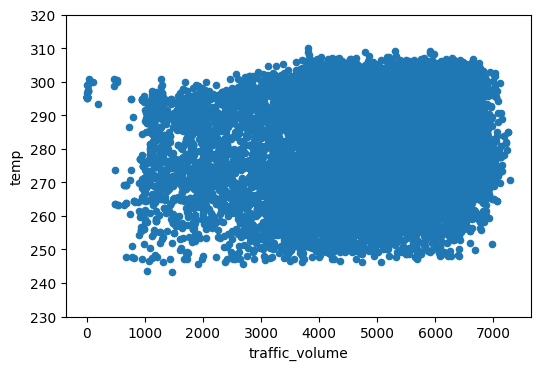

In [30]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()

`Temp` does not appear to be a factor for heavy traffic. There is not clear indication of a pattern or trend here.

Lets take a look at the other two weather columns `weather_main` and `weather_description`

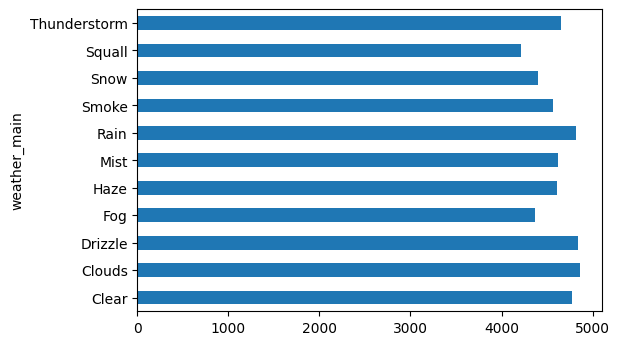

In [34]:
by_weather_main = day.groupby("weather_main").mean()
by_weather_main["traffic_volume"].plot.barh()
plt.show()

We don't see any weather type's that exceed `5,000` cars a day and there is not clear indication that these cause heavy traffic volume. 

Lets look at the `weather_description`.

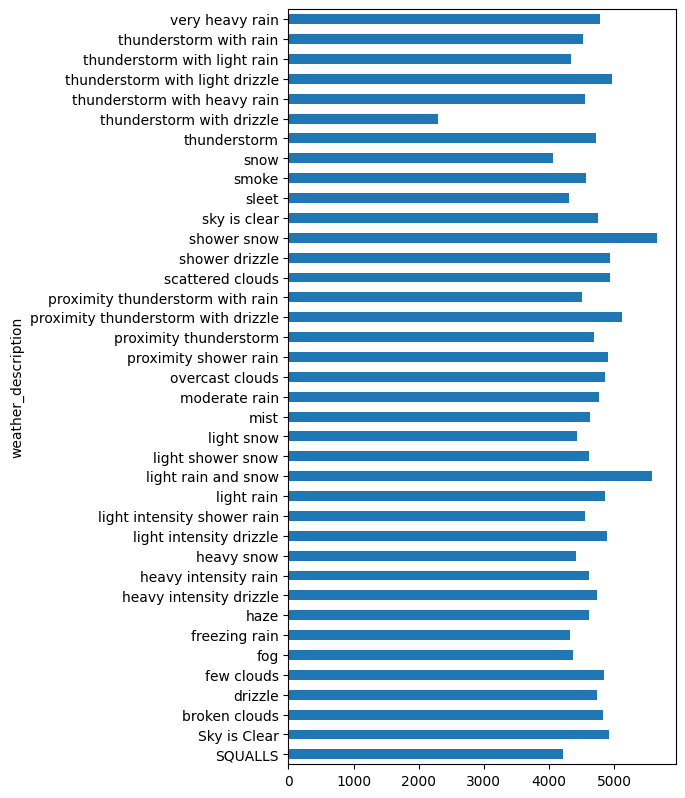

In [39]:
by_weather_description = day.groupby("weather_description").mean()
by_weather_description["traffic_volume"].plot.barh(figsize=(5,10))
plt.show()

We found that there are three types of weather— `shower snow,` `proximity thunderstorm with drizzle,` and `light rain and snow`— during which there tend to be more than 5,000 cars on the road per day, on average.

Interestingly, these weather conditions aren't usually considered to be severe or extreme. So, why would they result in higher traffic volume?

One possibility is that drivers tend to be more cautious in these weather conditions, leading them to drive more slowly and carefully. This could result in more cars on the road at the same time, which would appear as higher traffic volume.

Another possible explanation could be that in these kinds of weather, people may prefer to use their cars instead of walking, biking, or taking public transport. This would mean more cars on the road, and hence, increased traffic.

However, it's important to remember that these are just potential explanations based on the patterns we've noticed in the data. These specific weather conditions being linked to higher traffic volumes doesn't necessarily mean they're causing the increase. There may be other factors at play that aren't included in the data we analyzed.

### Conclusion

This project was aimed at identifying key factors influencing high traffic volumes on the I-94 Interstate highway. We successfully identified two main categories of indicators:

* Time-Related Indicators
    * Traffic volume tends to be higher during warmer months (from March through October) in contrast to cooler months (from November through February).
    * Business days usually experience higher traffic volumes compared to weekends.
    * During business days, peak hours generally occur around 7 am and 4 pm.


* Weather-Related Indicators
    * Certain weather conditions, such as "Shower snow", "Light rain and snow", and "Proximity thunderstorm with drizzle", are associated with increased traffic volumes.

This understanding of time and weather factors can assist in better planning and traffic management on the I-94 Interstate highway.